In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data and create dataframe
data_path = "/kaggle/input/california-housing-prices/housing.csv"
df = pd.read_csv(data_path)

In [3]:
# brief visualization 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# chck non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# drop null values
df.dropna(inplace=True)

In [6]:
# check non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

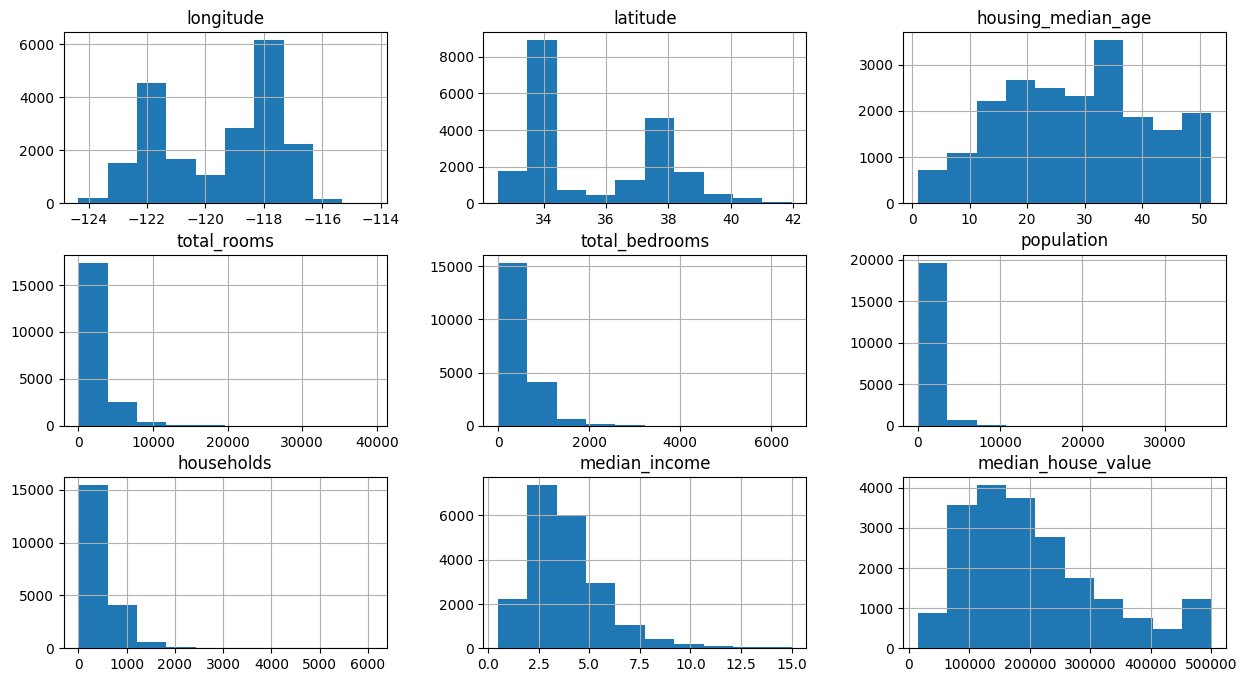

In [7]:
# check distribution 
df.hist(figsize=(15, 8))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

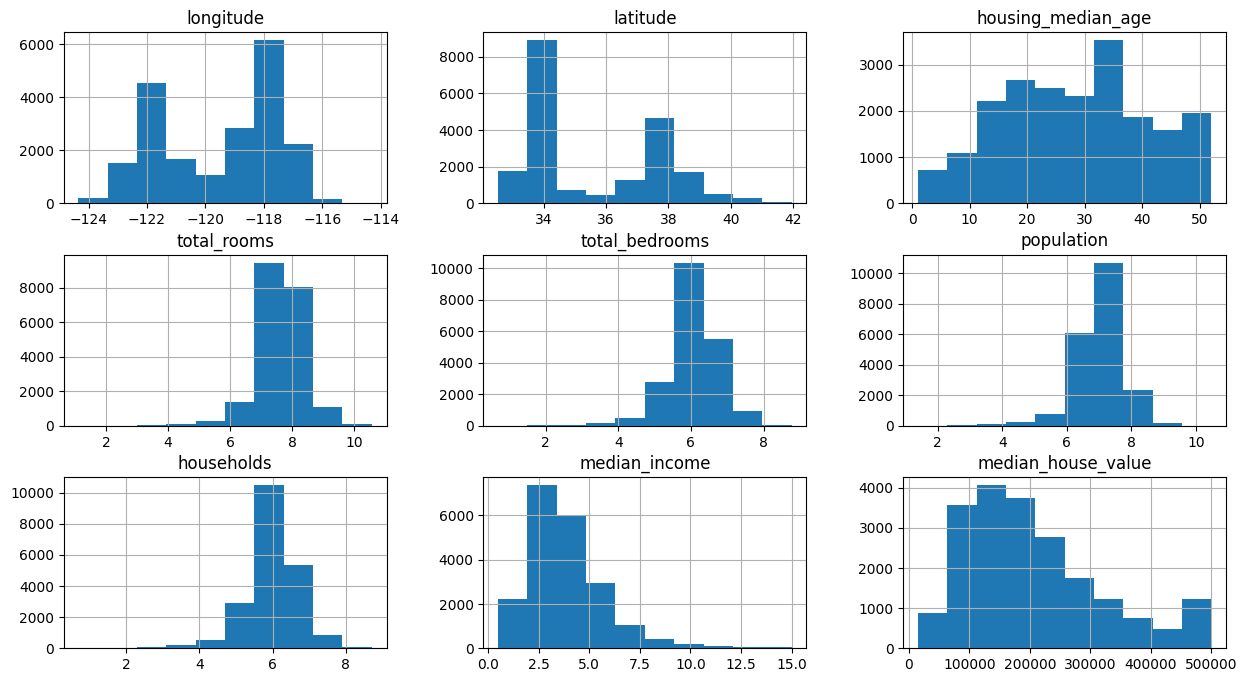

In [8]:
# check new distribution (after applying logarithm)
df["total_rooms"] = np.log(df["total_rooms"]+1)
df["total_bedrooms"] = np.log(df["total_bedrooms"]+1)
df["population"] = np.log(df["population"]+1)
df["households"] = np.log(df["households"]+1)

df.hist(figsize=(15, 8))

<Axes: >

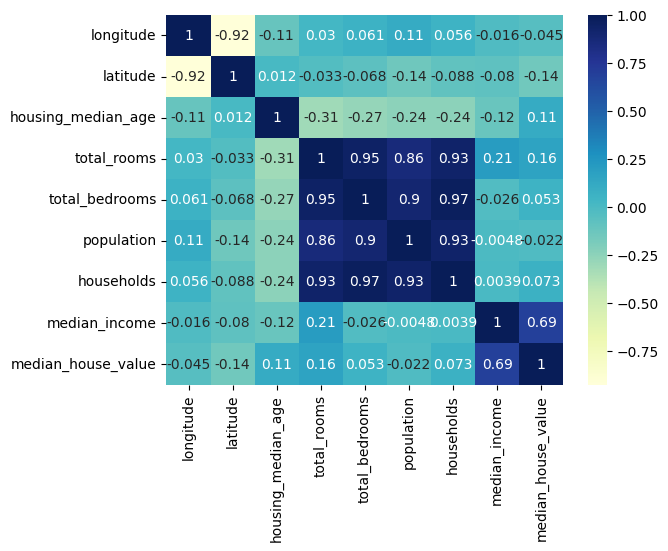

In [9]:
# check correlations
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [10]:
# feature engineering 
df['ocean_proximity'].value_counts()
ocean_proximity = pd.get_dummies(df["ocean_proximity"])
df = df.join(ocean_proximity).drop("ocean_proximity", axis=1)

<Axes: >

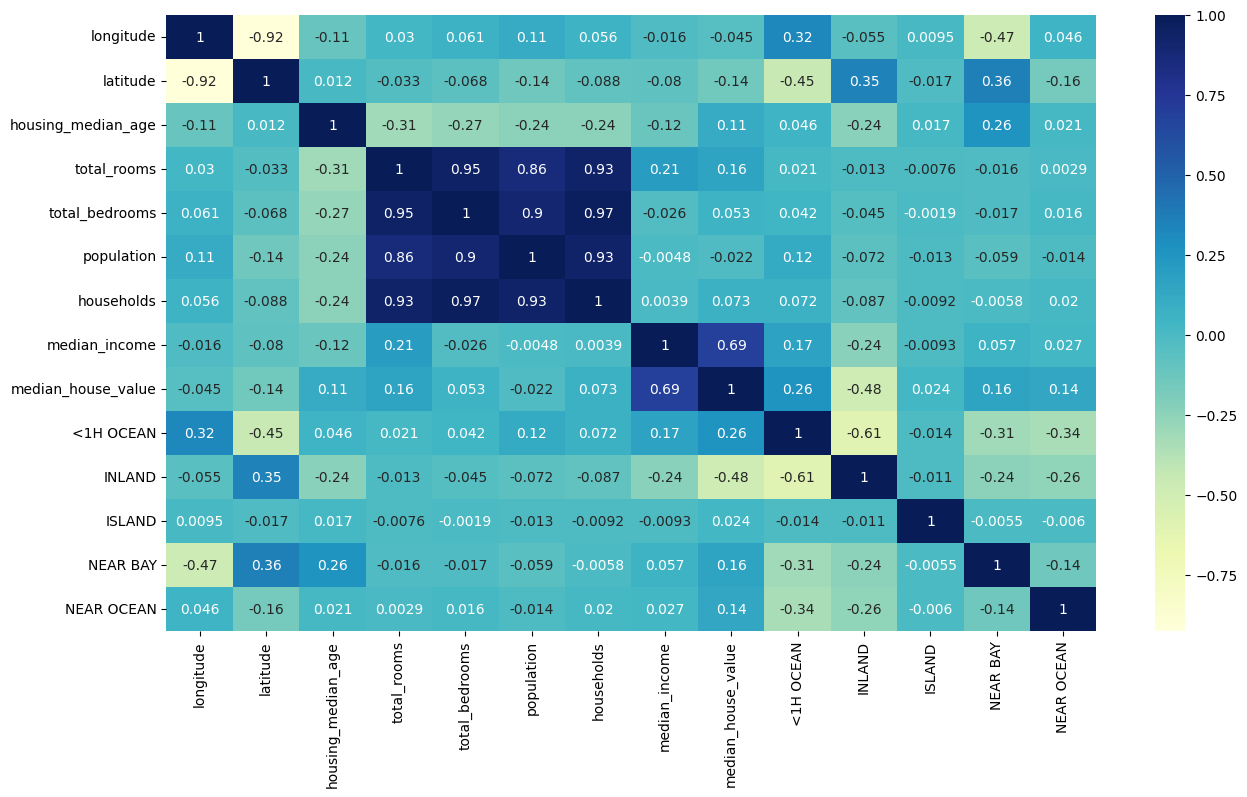

In [11]:
# check new correlations
plt.figure(figsize=(15,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [12]:
# feature engineering
df["bedroom_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["rooms_per_household"] = df["total_rooms"] / df["households"]

<Axes: >

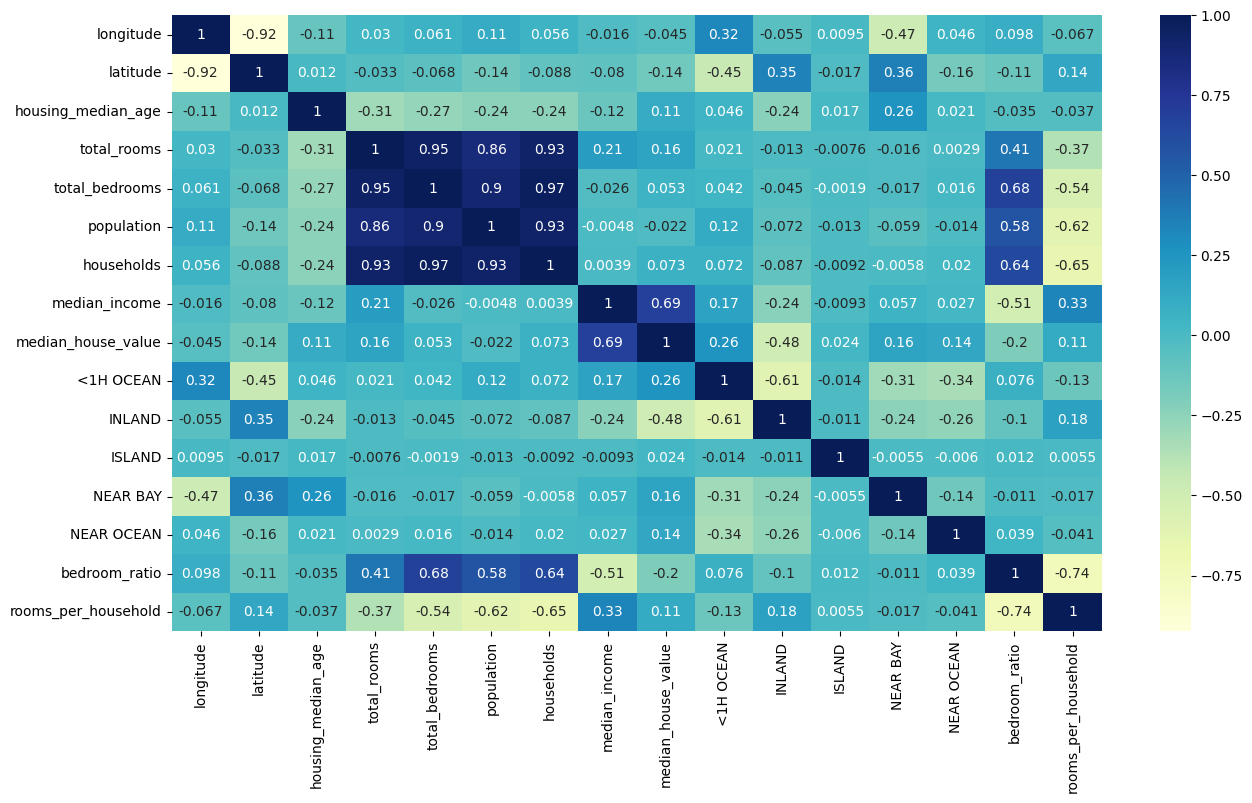

In [13]:
# check new correlations
plt.figure(figsize=(15, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

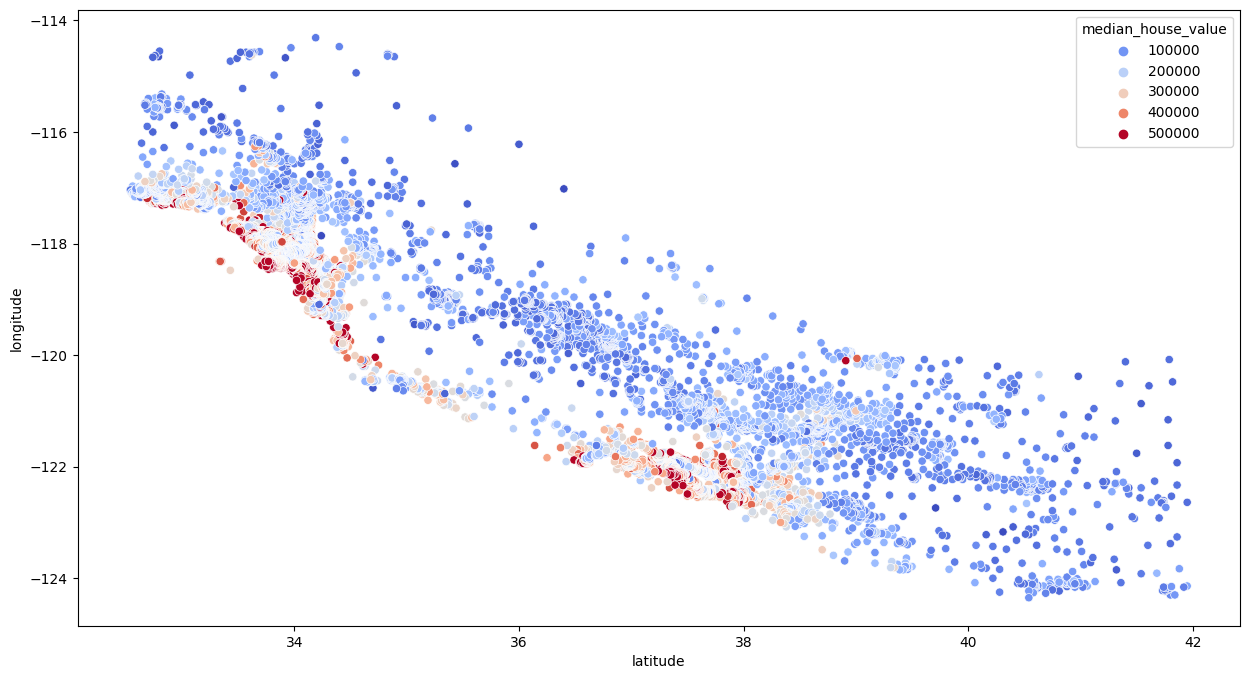

In [15]:
# use scatterplot to visualize the relationship between 
# the location (longitude and latitude) and the house pricing.
plt.figure(figsize=(15, 8))
sns.scatterplot(df, x="latitude", y="longitude", hue="median_house_value", palette="coolwarm")

In [14]:
# Save to CSV
df.to_csv('california_housing_modified.csv', index=False)


In [16]:
# prepare data for training
from sklearn.model_selection import train_test_split

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# inspect the data
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(16346, 15)
(4087, 15)
(16346,)
(4087,)


Linear regression

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6687407117584971

Linear regression scaled


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
lr_scaled.score(X_test_scaled, y_test)

0.6687407117584969

Random forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.820643832463932

Random forest scaled

In [21]:
rf_scaled = RandomForestRegressor()
rf_scaled.fit(X_train_scaled, y_train)
rf_scaled.score(X_test_scaled, y_test)

0.8184775875154943

Random forest with grid search

In [22]:
from sklearn.model_selection import GridSearchCV

rf_gridsearch = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

grid_search = GridSearchCV(
    estimator = rf_gridsearch,
    param_grid = param_grid,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    cv=5,
)

grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

score = best_rf_model.score(X_test, y_test)
print(f"Test set R² score: {score}")

Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Test set R² score: 0.8231052796837908


SVR (scaled)

In [23]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1000, epsilon=0.1, gamma='scale')
svr.fit(X_train_scaled, y_train)
svr.score(X_test_scaled, y_test)

0.6180989158824763

KNN scaled

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.7315700176215607

**Conclusion**: The best performing model is Random Forest with the optimal parameters found using grid search. Therefore, we are using that to build a streamlit app.

In [25]:
import joblib
model = grid_search.best_estimator_
joblib.dump(model, '/kaggle/working/rf_model.pkl')

['/kaggle/working/rf_model.pkl']